In [2]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
NEURAL_NETWORKS = ['KNN', 'NBayes', 'GradientBoosting', "RandomForest", 'DenseNet201', 'MobileNetV2', 'InceptionV3', "ResNet50"]
pre_name = "box_plot"
path_project = Path().absolute().parent.parent.parent
results_path = path_project / "6_resultados" / "analitycs" / "by_train"  / "_pre_plot" / "refined"
save_path = path_project / "6_resultados" / "analitycs" / "by_train" / "graphics"


In [4]:

files = [f for f in os.listdir(results_path)]

all_data = []
for file in files:
    if file.endswith(".csv"):
        df = pd.read_csv(results_path / file)
        all_data.append(df)

df = pd.concat(all_data, axis=0, ignore_index=True)


main_pd = df
        


In [5]:
main_pd

,dataset,network,partition,accuracy,precision,sensitivity,specificity,f1_score,npv,mcc,...,val_TP,val_TN,val_FP,val_FN,val_runtime,DenseNum,DropOut,FreezePercentage,BatchSize,epoch
0,90,GradientBoosting,1.0,0.986726,0.996134,0.977244,0.343949,0.986599,0.824427,0.333123,...,582.0,216.0,412.0,46.0,35.182141,NaN,NaN,NaN,NaN,NaN
1,90,GradientBoosting,2.0,0.983271,0.992331,0.974069,0.601639,0.983115,0.822870,0.490179,...,531.0,367.0,243.0,79.0,36.378118,NaN,NaN,NaN,NaN,NaN
2,90,GradientBoosting,3.0,0.977843,0.990137,0.965301,0.709360,0.977561,0.752613,0.476979,...,467.0,432.0,177.0,142.0,37.741588,NaN,NaN,NaN,NaN,NaN
3,90,GradientBoosting,4.0,0.983097,0.989016,0.977045,0.570248,0.982994,0.761589,0.404717,...,497.0,345.0,260.0,108.0,37.926609,NaN,NaN,NaN,NaN,NaN
4,90,GradientBoosting,5.0,0.985019,0.994065,0.975864,0.683946,0.984880,0.676033,0.356212,...,402.0,409.0,189.0,196.0,39.213118,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,65,KNN,96.0,0.991770,0.999165,0.984362,0.760070,0.991708,0.776386,0.541275,...,446.0,434.0,137.0,125.0,15.725247,NaN,NaN,NaN,NaN,NaN
16156,65,KNN,97.0,0.983436,0.996639,0.970143,0.838129,0.983212,0.661932,0.425421,...,318.0,466.0,90.0,238.0,16.035482,NaN,NaN,NaN,NaN,NaN
16157,65,KNN,98.0,0.962127,0.989908,0.933775,0.873504,0.961022,0.734195,0.567576,...,400.0,511.0,74.0,185.0,15.333801,NaN,NaN,NaN,NaN,NaN
16158,65,KNN,99.0,0.979243,0.996207,0.962149,0.786765,0.978882,0.707438,0.464325,...,367.0,428.0,116.0,177.0,15.880089,NaN,NaN,NaN,NaN,NaN


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def boxplot(main_pd, attribute):
    NEURAL_NETWORKS = ['KNN', 'NBayes', 'GradientBoosting', "RandomForest", 'DenseNet201', 'MobileNetV2', 'InceptionV3', "ResNet50"]

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=f"{attribute}",
                y='network', 
                data=main_pd,
                palette='Set1',
                width=0.6,
                linewidth=1.5,
                fliersize=5,
                orient='h',
                whis=np.inf,
                order=NEURAL_NETWORKS,
                showmeans=True,
                meanprops={"marker":"x",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black", 
                           "markersize":"5"})

    colors = ['gray', 'gray', 'gray', 'gray', '#2197c2', '#2197c2', '#2197c2', '#2197c2']
    for i, patch in enumerate(plt.gca().patches):
        patch.set_facecolor(colors[i % 8])

    plt.xlabel('')
    plt.ylabel('')

    plt.xticks(np.arange(0, 1.1, 0.1), [f"{int(i*100)}%" for i in np.arange(0, 1.1, 0.1)])

    # Annotate mean values on the right side
    mean_values = main_pd.groupby('network')[attribute].mean()
    for i, network in enumerate(NEURAL_NETWORKS):
        mean_val = mean_values[network]
        percent = mean_val * 100
        plt.text(1.06, i, f'{percent:.2f}%', color='black', va='center', fontdict={'size': 11})
    
    # Add horizontal line at 3.5
    plt.axhline(y=3.5, color='black', linewidth=1.5, linestyle='--')

    # Add text in top right corner "Mean(x)"
    plt.text(
        1, -0.7, f"Mean(x)", color='black', va='center', fontdict={'size': 11,  'style': 'italic'}
    )
    
    # Set dotted gridlines along y-axis
    plt.grid(axis='y', linestyle='--')
    plt.grid(axis='x', linestyle='-')

    title = attribute.split('_')[1].capitalize()
    # background color green and round border
    plt.title(f'{title}', 
              fontsize=12, 
              fontweight='bold',
              pad=10, color='black',
              loc='center',
              backgroundcolor='white',
              bbox=dict(facecolor='lightgreen', edgecolor='none', boxstyle='round,pad=0.5'))


    plt.savefig(save_path / f"{pre_name}_{attribute}.pdf", dpi=300, bbox_inches='tight')
    plt.show()


/tmp/ipykernel_218203/3297475014.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


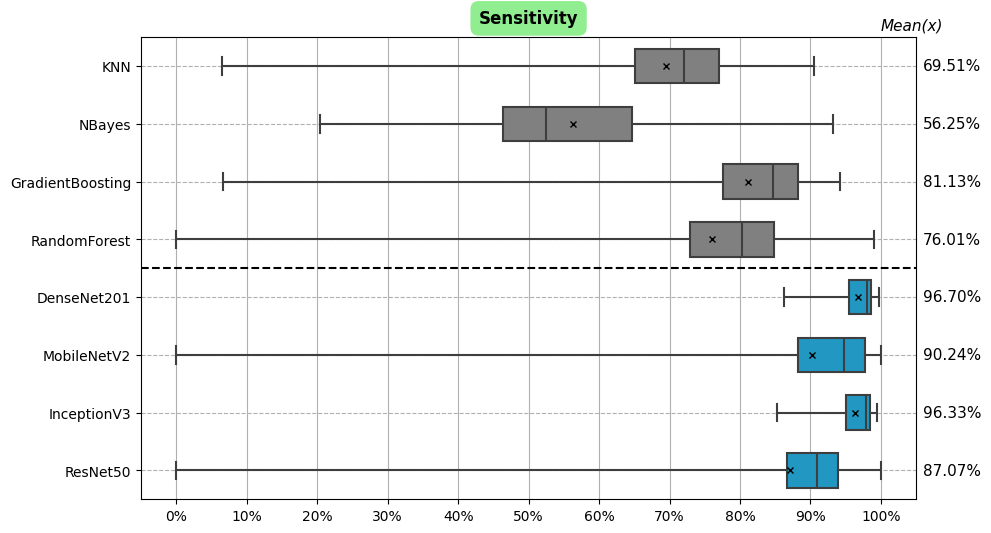

/tmp/ipykernel_218203/3297475014.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


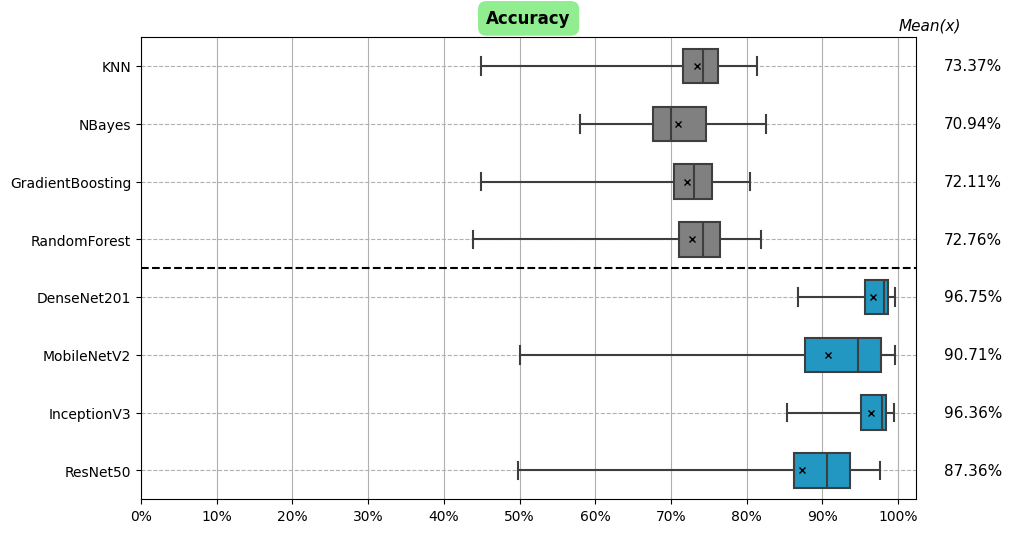

/tmp/ipykernel_218203/3297475014.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


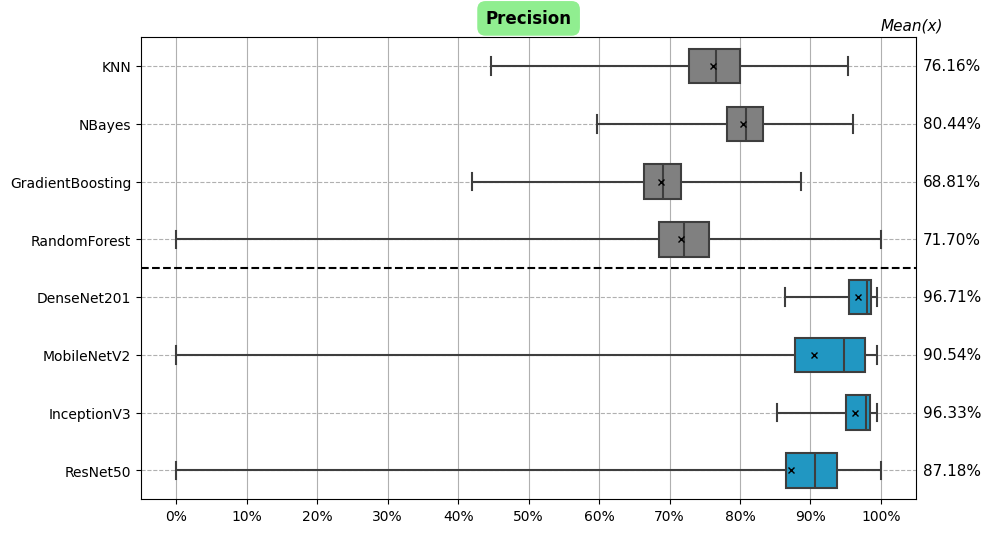

/tmp/ipykernel_218203/3297475014.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


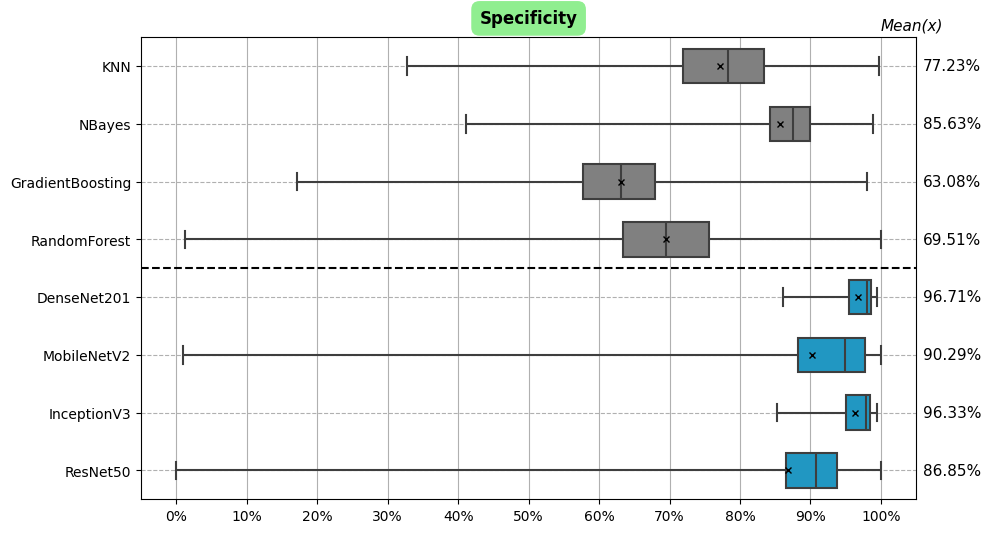

/tmp/ipykernel_218203/3297475014.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


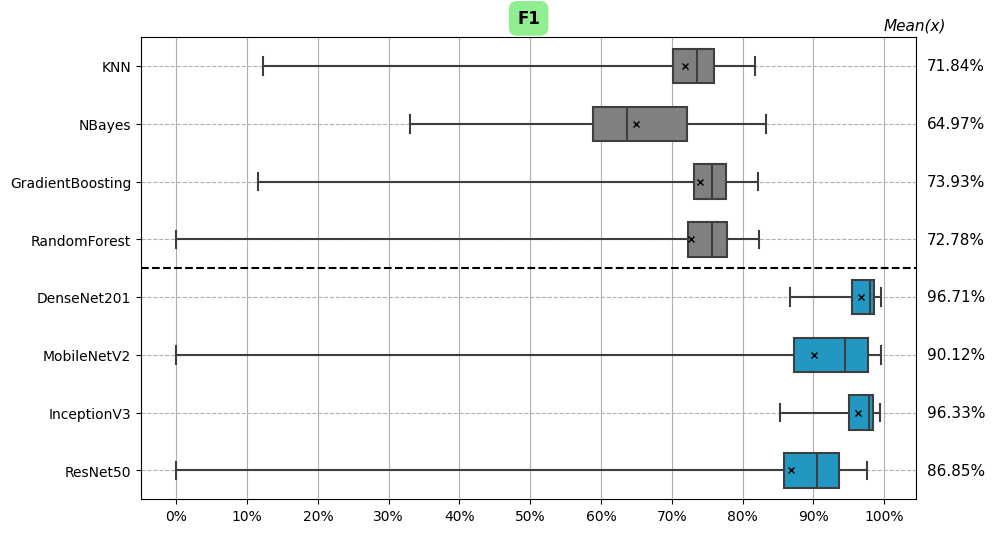

/tmp/ipykernel_218203/3297475014.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


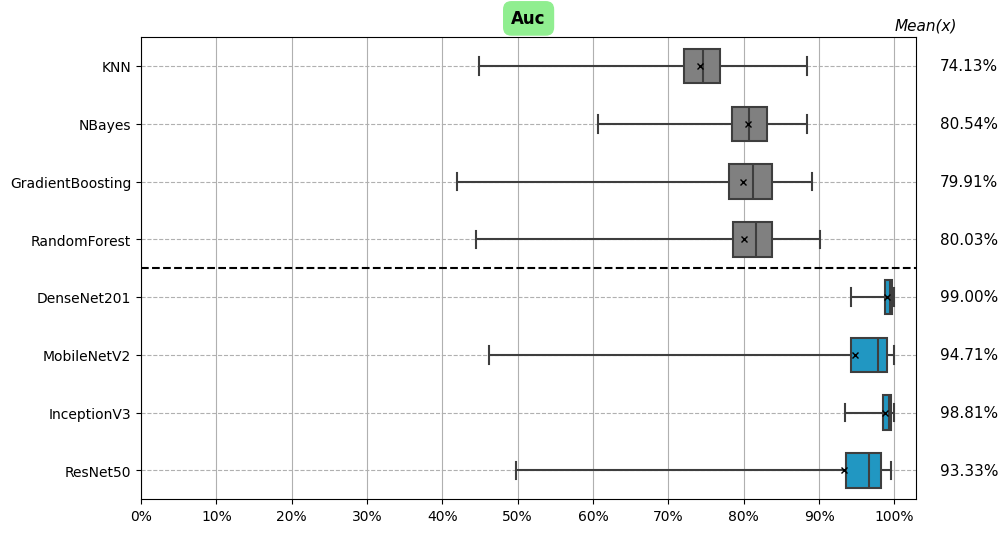

/tmp/ipykernel_218203/3297475014.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


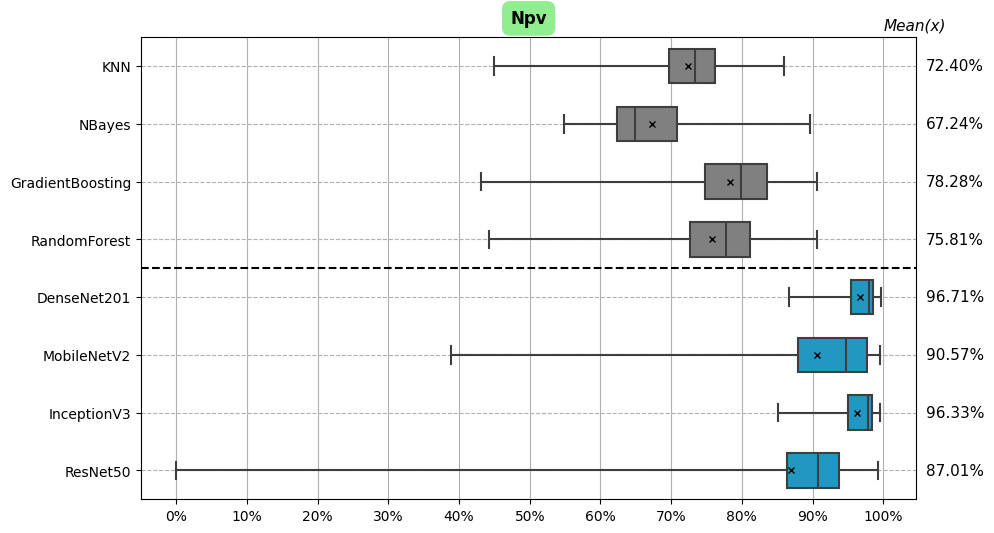

/tmp/ipykernel_218203/3297475014.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"{attribute}",


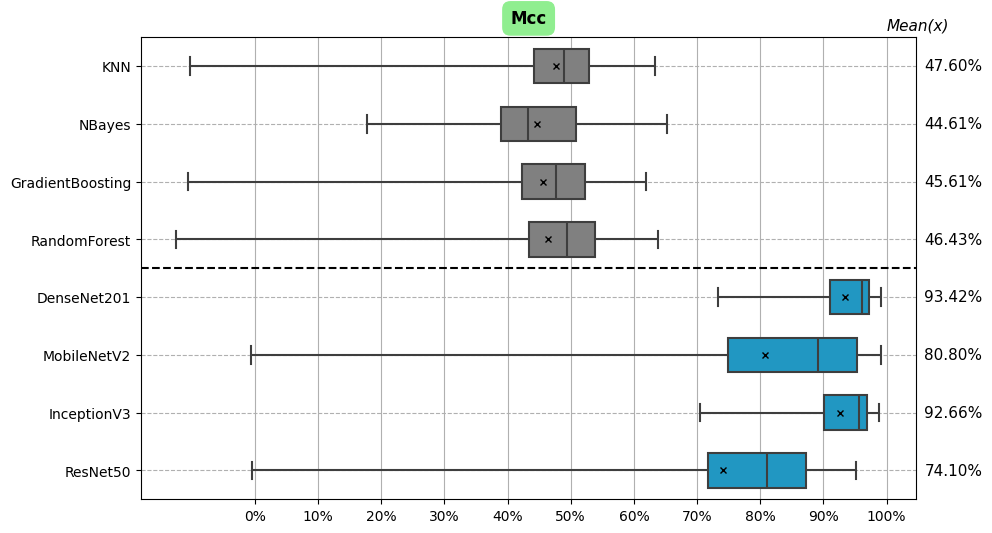

In [27]:
COLUMNS = ["val_sensitivity", "val_accuracy", "val_precision", "val_specificity", "val_f1_score", "val_auc", "val_npv", "val_mcc"]

for column in COLUMNS:
    boxplot(main_pd, column)

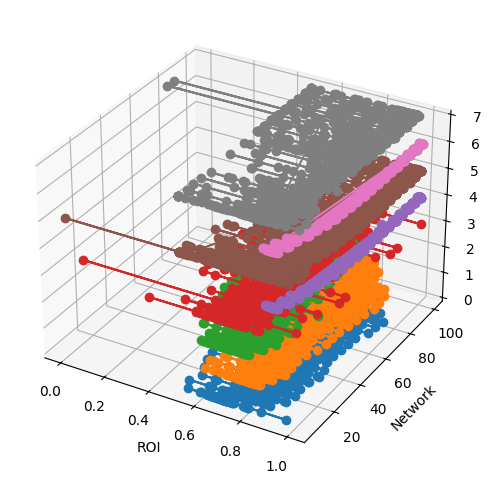

In [18]:
# make plot 3d network X attribute x Roi

# make plot 3d network X attribute x Roi

def plot3dArea(main_pd, attribute):
    NEURAL_NETWORKS = ['KNN', 'NBayes', 'GradientBoosting', "RandomForest", 'DenseNet201', 'MobileNetV2', 'InceptionV3', "ResNet50"]
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    for i, network in enumerate(NEURAL_NETWORKS):
        network_pd = main_pd[main_pd['network'] == network]
        x = network_pd['dataset']
        y = network_pd['network']
        z = network_pd[attribute]

        # convert to numeric

        # x 0 to 100%
        y = pd.Categorical(y, categories=NEURAL_NETWORKS, ordered=True).codes

    
        
        ax.plot3D(z, x, y, 'o-')

    ax.set_xlabel('ROI')
    ax.set_ylabel('Network')
    ax.set_zlabel(attribute)

    plt.show()

  
plot3dArea(main_pd, 'val_precision')